# UTS - Simple Linear Regression

Load Boston Housing Price sebagai sample dataset pada Scikit Learn.

In [1]:
from sklearn.datasets import load_boston

boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [2]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
from sklearn import datasets
import pandas as pd

boston_data = datasets.load_boston()
df_boston = pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
df_boston['target'] = pd.Series(boston_data.target)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Sample Dataset

Saya mengambil 1 features yaitu RM sebagai rata-rata kamar per rumah. Alasan features RM yang diambil untuk mengetahui prediksi harga rumah bila diketahui jumlah rata-rata kamar per rumah. Maka dictionary (var rumah) terdiri dari 2 buah key yaitu rata-rata kamar dan harga rumah.

+ rata-rata kamar mepresentasikan features
+ harga merepresentasikan target

In [4]:
import pandas as pd

rumah = {'rata-rata kamar': [6.575, 6.421, 7.185, 6.998, 7.147],
        'harga' : [24, 21.6, 34.7, 33.4, 36.2]}

rumah_df = pd.DataFrame(rumah)
rumah_df

,rata-rata kamar,harga
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2


## Visualisasi Data

Visualisasi data rumah menggunakan scatter plot. rumah_df.plot menggunakan 3 parameter yaitu:

+ kind yang bernilai scatter, karena plotting yang digunakan adalah scatter plot.
+ x berasosiasi dengan rata-rata kamar.
+ y berasosiasi dengan harga.
+ plt.xlim dan plt.ylim digunakan untuk mengatur jangkauan sumbu x dan y.

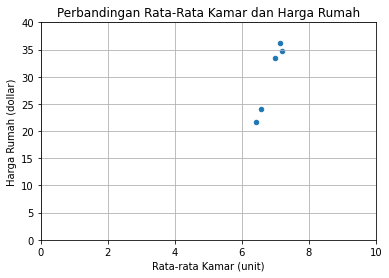

In [5]:
import matplotlib.pyplot as plt

rumah_df.plot(kind='scatter', x='rata-rata kamar', y='harga')

plt.title('Perbandingan Rata-Rata Kamar dan Harga Rumah')
plt.xlabel('Rata-rata Kamar (unit)')
plt.ylabel('Harga Rumah (dollar)')
plt.xlim(0, 10)
plt.ylim(0, 40)
plt.grid(True)
plt.show()


Setiap data point atau markernya (titik berwarna biru) merepresentasikan 1 baris dari dataframe yang dimiliki. Model linear regression berkaitan dengan persamaan garis lurus, karena itu bisa dilihat titik membentuk garis lurus ke atas.

## Simple Linear Regression Model

### Penyesuaian Dataset

Penyesuaian ini dilakukan dengan mengelompokkan terlebih dahulu features dan target kedalam dua variable terpisah dan mengkonversi struktur data yang semula menggunakan pandas dataframe menjadi numpy array.

+ Rata-rata kamar merupakan nilai features yang diseleksi terlebih dahulu lalu dikonversi menjadi numpy array dan ditampung ke dalam variable x.
+ Harga merupakan nilai target yang diseleksi terlebih dahulu lalu dikonversi menjadi numpy array dan ditampung ke dalam variable y.

In [6]:
import numpy as np

X = np.array(rumah_df['rata-rata kamar'])
y = np.array(rumah_df['harga'])

print(f'X: {X}')
print(f'y: {y}')

X: [6.575 6.421 7.185 6.998 7.147]
y: [24.  21.6 34.7 33.4 36.2]


Variable x hanya terdiri dari 1 dimensi sedangkan model machine learning dalam skicit-learn membutuhkan sekumpulan nilai features yang dirampung dalam suatu array 2 dimensi. Maka dilakukanlah proses reshaping terhadap array yang digunakan untuk menampung nilai features menggunakan method **reshape()**.

In [7]:
X = X.reshape(-1, 1)
X.shape

(5, 1)

In [8]:
X

array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147]])

Munculah suatu array 2 dimensi dimana jumlah baris yaitu 5 dan jumlah kolom yaitu 1.

## Training Simple Linear Regression Model

Selanjutnya melakukan proses training model machine learning. Training dilakukan dengan menggunakan method fit(). Membutuhkan 2 parameter yaitu sekumpulan nilai features dan target.

In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression()

Pada tahap ini, model sudah berstatus trained model.

## Visualisasi Simple Linear Regression Model

+ Linear regression merupakan model sederhana dan akan menghasilkan garis lurus. Oleh karena itu, untuk menvisualisasikan persamaan garis maka yang pertama menyiapkan 2 buah nilai untuk x yaitu 0 dan 10.
+ Kedua nilai tersebut dilakukan karena ingin melakukan plotting pada area berukuran 10 x 40 dan mengambil nilai terkecil dan terbesarnya yaitu 0 dan 40.
+ Karena menggunakan numpy array kembali jangan lupa untuk menggunakan method __reshape()__ agar dapat menghasilkan array 2 dimensi.
+ Dari hasil X_vis dilakukan prediksi untuk nilai y / target, maka dilakukan pemanggilan dengan model.predict(X_vis).

In [10]:
X_vis = np.array([0, 10]).reshape(-1, 1)
y_vis = model.predict(X_vis)

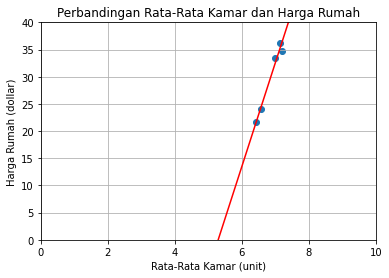

In [11]:
plt.scatter(X, y)
plt.plot(X_vis, y_vis, '-r') 

plt.title('Perbandingan Rata-Rata Kamar dan Harga Rumah')
plt.xlabel('Rata-Rata Kamar (unit)')
plt.ylabel('Harga Rumah (dollar)')
plt.xlim(0, 10)
plt.ylim(0, 40)
plt.grid(True)
plt.show()

+ Garis merah tersebut akan memiliki formula persamaan seperti berikut:

  - **Intercept** merupakan titik pada sumbu y dimana garis linear yang terbentuk menabrak suatu titik di sumbu y ketika sumbu x     bernilai 0.
  - **Slope** akan berpengaruh pada tingkat kemiringan dari garis linear yang terbentuk dan akan menghasilkan garis horizontal.
  
Formula Linear Regression: $y = \alpha + \beta x$

+ $y$: response variable
+ $x$: explanatory variable
+ $\alpha$: intercept
+ $\beta$: slope


+ Untuk menampilkan nilai intercept dengan memanggil model objek lalu diikuti .intercept_
+ Untuk menampilkan nilai slope dengan memanggil model objek lalu diikuti .coef_

In [12]:
print(f'intercept: {model.intercept_}')
print(f'slope: {model.coef_}')

intercept: -101.00266054526917
slope: [19.07921991]


## Prediksi Harga Rumah

Prediksi harga rumah ditentukan berdasarkan rata-rata kamar per rumah maka diambil 3 nilai rata-rata kamar, yaitu 8.123; 8.500; 9.468 sebagai features yang akan diprediksi. Lalu 3 nilai tersebut dibundle menjadi np array.

In [13]:
rata_rata_kamar = np.array([8.123, 8.500, 9.468]).reshape(-1, 1)
rata_rata_kamar

array([[8.123],
       [8.5  ],
       [9.468]])

In [14]:
prediksi_harga = model.predict(rata_rata_kamar)
prediksi_harga

array([53.97784281, 61.17070871, 79.63939359])

Dengan proses penentuan prediksi diatas output yang keluar merupakan perkiraan 3 harga rumah.

In [15]:
for rtakmr, hrg in zip(rata_rata_kamar, prediksi_harga):
    print(f'rata-rata kamar: {rtakmr} prediksi harga: {hrg}')

rata-rata kamar: [8.123] prediksi harga: 53.977842806304196
rata-rata kamar: [8.5] prediksi harga: 61.1707087134251
rata-rata kamar: [9.468] prediksi harga: 79.63939358900346


## Evaluasi Simple Linear Regression

### Training & Testing Dataset

X_train dan y_train langsung menggunakan np array.

In [16]:
X_train = np.array([6.575, 6.421, 7.185, 6.998, 7.147]).reshape(-1, 1)
y_train = np.array([24, 21.6, 34.7, 33.4, 36.2])

X_test = np.array([6.595, 7.543, 7.235, 9.549, 8.436]).reshape(-1, 1)
y_test = np.array([24.8, 42.9, 37, 81.1, 59.9])

### Training Simple Linear Regression Model

Lalu dibentuk kembali objek model untuk ditraining dengan menggunakan linear regression.

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Evaluasi Linear Regression Model dengan Coefficient of Determination atau R-squared ($R^2$)

+ Import metrics evaluasi dengan memanggil sklearn.metrics lalu import r2_score.
+ Terdapat nilai y real (y_test) dan y hasil prediksi untuk membandingkan.

In [18]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)

r_squared = r2_score(y_test, y_pred)

print(f'R-squared: {r_squared}')

R-squared: 0.9999939075262082


Jika R-squared semakin mendekati 1 maka semakin baik dan jika semakin mendekati 0 maka semakin buruk. Tidak menutup kemungkinan mendapatkan nilai (-) sebagai nilai terburuk.